# Proyek Analisis Data: Bike Sharing
- **Nama:** Duma Mora Arta Sitorus
- **Email:** dumamora5@gmail.com
- **ID Dicoding:** duma_mora

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca dan musim terhadap jumlah penyewaan sepeda?
- Pertanyaan 2 : Pada jam berapa dan hari apa jumlah penyewaan sepeda paling tinggi dan paling rendah?
- Pertanyaan 3 : Bagaimana pengaruh parameter suhu, kelembaban, dan kecepatan angin terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [245]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/DumaSitorus/analisis-data/refs/heads/main/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [246]:
day_df = pd.read_csv("https://raw.githubusercontent.com/DumaSitorus/analisis-data/refs/heads/main/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset Bike Sharing telah berhasil dibaca menggunakan fungsi panda yaitu read_csv yang membaca dataset melalui link Github
- Dataset terdiri dari 2 file dan disimpan ke dalam dataframe bernama hour_df dan day_df
- Dataset terdiri dari kolom berikut:
  - instant: record index
	- dteday : tanggal
	- season : musim (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : tahun (0: 2011, 1:2012)
	- mnth : bulan ( 1 to 12)
	- hr : jam (0 to 23)
	- holiday : hari libur berdasarkan jadwal libur berikut: http://dchr.dc.gov/page/holiday-schedule
	- weekday : hari dalam pekan
	- workingday : jika bukan akhir pekan dan hari libut maka bernilai 1,selainnya bernilai 0.
	- weathersit :
		 - 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
     - 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
     - 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan tersebar, HujanRingan + Awan tersebar
     - 4: Hujan Lebat + Es + Badai Petir + Kabut, Salju + Kabut
    - temp: Suhu yang dinormalkan dalam Celcius. Nilai dibagi menjadi 41 (maks)
    - atemp: Suhu yang dinormalkan dalam Celcius. Nilai dibagi menjadi 50 (maks)
    - hum: Kelembapan yang dinormalkan. Nilai dibagi menjadi 100 (maks)
    - windspeed: Kecepatan angin yang dinormalkan. Nilai dibagi menjadi 67 (maks)
    - casual: jumlah pengguna kasual
    - registered: jumlah pengguna terdaftar
    - cnt: jumlah total sepeda sewaan termasuk kasual dan terdaftar

  Catatan: pada dataset day.csv tidak terdapat kolom hr karena data didistribusikan perhari, sedangkan data pada dataset hour didistribusikan perjam setiap harinya.

### Assessing Data

In [247]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [248]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
Dari kedua dataframe dijalankan fungsi info() untuk menmapilkan struktur dataframe tersebut, dan diperoleh hasil analisis sebagai berikut:
- Tidak terdapat nilai null pada baris data manapun sehingga tidak perlu penanganan untuk Missing Value
- Terdapat kesalahan pada tipe data untuk kolom dteday yang seharusnya datetime sehingga perlu pengangan untuk Tipe data pada kolom dtday

In [249]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


**Insight:**
Dari kedua dataframe dijalankan fungsi diplicated() untuk menampilkan jumlah duplikasi data yang terdapat pada dataframe, dan diperoleh hasil analisis sebagai berikut:
- Tidak terdapat data yang duplikat baik pada dataframe day maupun dataframe hour sehingga tidak perlu menanganan duplicate data

In [250]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [251]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
Dari kedua dataframe dijalankan fungsi describe(include="all") untuk menampilkan ringkasan statistik dari dataset, sehingga diperoleh hasil analisis sebagai berikut:
- Terdapat nilai data 0 pada kolom atemp yang cukup mencurigakan sehingga perlu analisis lebih lanjut untuk mendeteksi apakah terjadi Innacurate value.
- Terdapat nilai data 0 pada kolom hum yang merupakan Innacurate Value karena dalam kasus nyata tidak memingkinkan kelembapan udara linkungan benar-benar 0%. Bahkan di daerah gurun yang sangat kering, kelembaban udara masih berada di sekitar 10-20%. sehingga perlu penanganan Innacurate value pada kolom hum.

In [252]:
day_df[day_df["hum"] == 0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


In [253]:
hour_df[hour_df['dteday'].isin(["2011-03-10"])]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


**Insight:**
Setalah melakukan analisis lanjutan pada kolom hum, maka diperoleh simpulan sebagai berikut:
- Terdapat 24 baris data dengan nilai kelembaban 0 (berada dalam 1 hari yang sama), sehingga dapat dipastikan terjadi kesalahan input data
- Karena data murupakan time series maka dapat menggunakan Interpolasi Time-Series untuk mengisi data tersebut berdasarkan tren waktu secara bertahap.
- Keputusan: Perlu melakukan penganan Innacurate Value pada kolom hum di tahap cleaning data.

In [254]:
hour_df[hour_df['dteday'].isin(["2011-01-22"])]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
479,480,2011-01-22,1,0,1,0,0,6,0,1,0.04,0.0303,0.45,0.2537,0,13,13
480,481,2011-01-22,1,0,1,1,0,6,0,2,0.04,0.0000,0.41,0.3881,3,9,12
481,482,2011-01-22,1,0,1,2,0,6,0,2,0.04,0.0303,0.41,0.2537,0,11,11
482,483,2011-01-22,1,0,1,3,0,6,0,2,0.04,0.0303,0.41,0.2836,1,6,7
483,484,2011-01-22,1,0,1,4,0,6,0,2,0.02,0.0152,0.48,0.2985,0,3,3
484,485,2011-01-22,1,0,1,6,0,6,0,2,0.02,0.0303,0.44,0.2239,0,2,2
485,486,2011-01-22,1,0,1,7,0,6,0,1,0.02,0.0152,0.44,0.2836,0,8,8
486,487,2011-01-22,1,0,1,8,0,6,0,1,0.02,0.0000,0.44,0.3284,1,26,27
487,488,2011-01-22,1,0,1,9,0,6,0,1,0.04,0.0303,0.41,0.2537,3,37,40
488,489,2011-01-22,1,0,1,10,0,6,0,2,0.04,0.0606,0.41,0.1642,3,50,53


**Insight:**
Untuk melakukan analisis lanjuta pada kolom atemp yang memiliki nilai 0 pada baris datanya maka dijalankan perintah seperti pada kode diatas. Diperoleh hasil analisis sebagai berikut:
- Terdapat 2 baris data uang memiliki nilai atemp 0 pada dataframe hour
- Suhu 0 tersebut diukur pada hari yang sama yaitu 22 Januari 2011 yang kemungkinan musim dingin.
- Jika ditelaah lebih lanjut terdapat pola pada dengan mempertimbangkan kolom weatersit dan temp di data sebelum dan sesudah data tersebut.
- Karena ditemukan pola maka Missing Value dapat ditangani dengan mengganti nilai 0 menjadi nilai tertentu.
- Keputusan: Perlu melakukan penganan Innacurate Value pada kolom atemp di tahap cleaning data.

### Cleaning Data

Pada proses Assesing data telah ditemukan beberapa masalah yang perlu ditangani antara lain:
1. Perbaikan tipe data pada kolom dteday di kedua dataframe menjadi datetime
2. Penanganan innacurate value pada baris data yang memiliki nilai 0 pada kolom hum
3. Penanganan innacurate valie pada baris data uang memiliki nilai 0 pada kolom atemp

In [255]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [256]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [257]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [258]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
Perbaikan tipe data kolom dteday dengan menggunakan fungsi to_datetime dari pandas sehingga dapat dilihat pada kolom Dtype telah berubah dari object menjadi datetime.

In [259]:
# Ganti nilai 0 dengan NaN
hour_df.loc[hour_df["hum"] == 0, "hum"] = np.nan

In [260]:
hour_df[hour_df['dteday'].isin(["2011-03-10"])]

<ipython-input-260-e02409cd68d5>:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  hour_df[hour_df['dteday'].isin(["2011-03-10"])]


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,NaN,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,NaN,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,NaN,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,NaN,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,NaN,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,NaN,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,NaN,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,NaN,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,NaN,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,NaN,0.2537,6,5,11


In [261]:
# Buat nilai median berdasarkan kombinasi 'weathersit', 'temp', 'atemp', dan 'windspeed'
median_hum = hour_df.groupby(["weathersit", "temp", "atemp", "windspeed"])["hum"].median()

# Fungsi untuk mengisi nilai NaN berdasarkan median dari kelompok yang cocok
def fill_hum(row):
    if np.isnan(row["hum"]):
        return median_hum.get((row["weathersit"], row["temp"], row["atemp"], row["windspeed"]), np.nan)
    return row["hum"]

In [262]:
# Terapkan fungsi untuk mengisi nilai yang kosong
hour_df["hum"] = hour_df.apply(fill_hum, axis=1)

In [263]:
hour_df[hour_df['dteday'].isin(["2011-03-10"])]

<ipython-input-263-e02409cd68d5>:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  hour_df[hour_df['dteday'].isin(["2011-03-10"])]


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.790,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.790,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.790,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.815,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.870,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.905,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.780,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.820,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.870,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.820,0.2537,6,5,11


In [264]:
hour_df["hum"] = hour_df["hum"].interpolate(method="linear")

In [265]:
hour_df[hour_df['dteday'].isin(["2011-03-10"])]

<ipython-input-265-e02409cd68d5>:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  hour_df[hour_df['dteday'].isin(["2011-03-10"])]


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.790,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.790,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.790,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.815,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.870,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.905,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.780,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.820,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.870,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.820,0.2537,6,5,11


In [266]:
# Tentukan tanggal target
target_date = "2011-03-10"

# Hitung rata-rata 'hum' untuk tanggal tersebut dari hour_df
avg_hum = hour_df[hour_df["dteday"] == target_date]["hum"].mean()

# Assign nilai rata-rata tersebut ke day_df pada baris dengan tanggal yang sama
day_df.loc[day_df["dteday"] == target_date, "hum"] = avg_hum

In [267]:
day_df[day_df['dteday'].isin(["2011-03-10"])]

<ipython-input-267-d6486f4da214>:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  day_df[day_df['dteday'].isin(["2011-03-10"])]


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.838409,0.261877,46,577,623


**Insight:**
Penanganan Innacurate value pada kolom hum dengan mempertimbangkan pola nilai pada kolom weatersit, temp, atemp, dan windspeed dari seluruh data yang ada. Langkah penanganan innacurate value pada kolom hum adalah sebagai berikut:
1. Mengganti nilai 0 menjadi NaN untuk memudahkan pengisian nya dengan menggunakan fungsi yang tersedia.
2. Membuat nilai median berdasarkan kombinasi 'weathersit', 'temp', 'atemp', dan 'windspeed'
3. Membuat fungsi untuk mengisi nilai NaN berdasarkan median dari kelompok yang cocok
4. Menerapkan fungsi yang telah dibuat pada langkah 3
5. Mengisi nilai 0 kolom hum di dataframe day dengan rata-rata nilai kolom hum datagrame hour di hari yang sama.

In [268]:
hour_df.loc[hour_df["instant"] == 481, "atemp"] = 0.0303
hour_df.loc[hour_df["instant"] == 487, "atemp"] = 0.0152

In [269]:
hour_df[hour_df['dteday'].isin(["2011-01-22"])]

<ipython-input-269-6a0f5fed13eb>:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  hour_df[hour_df['dteday'].isin(["2011-01-22"])]


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
479,480,2011-01-22,1,0,1,0,0,6,0,1,0.04,0.0303,0.45,0.2537,0,13,13
480,481,2011-01-22,1,0,1,1,0,6,0,2,0.04,0.0303,0.41,0.3881,3,9,12
481,482,2011-01-22,1,0,1,2,0,6,0,2,0.04,0.0303,0.41,0.2537,0,11,11
482,483,2011-01-22,1,0,1,3,0,6,0,2,0.04,0.0303,0.41,0.2836,1,6,7
483,484,2011-01-22,1,0,1,4,0,6,0,2,0.02,0.0152,0.48,0.2985,0,3,3
484,485,2011-01-22,1,0,1,6,0,6,0,2,0.02,0.0303,0.44,0.2239,0,2,2
485,486,2011-01-22,1,0,1,7,0,6,0,1,0.02,0.0152,0.44,0.2836,0,8,8
486,487,2011-01-22,1,0,1,8,0,6,0,1,0.02,0.0152,0.44,0.3284,1,26,27
487,488,2011-01-22,1,0,1,9,0,6,0,1,0.04,0.0303,0.41,0.2537,3,37,40
488,489,2011-01-22,1,0,1,10,0,6,0,2,0.04,0.0606,0.41,0.1642,3,50,53


**Insight:**
Penanganan Innacurate value pada kolom atemp dengan pertimbangan nilai yang ada pada tanggal yang sama dengan nilai weathersit dan temp yang sama. Karena innacurate value hanya ada 2 baris saja maka dilakukan inisialisasi data secara manual menggunakan loc.

## Exploratory Data Analysis (EDA)

### Explore yang akan dilakukan untuk menjawab pertanyaan bisnis yang dibuat diawal antara lain:

1. Rata-rata jumlah penyewaan sepeda berdasarkan musim.

In [270]:
season_mapping = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}

day_df_season = day_df.copy()

day_df_season["season"] = day_df_season["season"].map(season_mapping)

day_df_season.groupby("season").agg({
    "cnt": ["max", "min", "mean"]
})

cnt                   
         max   min         mean
season                         
fall    8714  1115  5644.303191
spring  7836   431  2604.132597
summer  8362   795  4992.331522
winter  8555    22  4728.162921

**Insight:**
- Rata-rata peminjaman sepeda terbanyak pada musim gugur
- Rata-rata peminjaman sepeda paling sedikit pada musim semi

2. Rata-rata peminjaman sepeda tiap tahun

In [271]:
year_mapping = {0: "2011" , 1: "2012"}

day_df_year = day_df.copy()

day_df_year["yr"] = day_df_year["yr"].map(year_mapping)

day_df_year.groupby("yr").agg({
    "cnt": ["max", "min", "mean","sum"]
})

cnt                           
       max  min         mean      sum
yr                                   
2011  6043  431  3405.761644  1243103
2012  8714   22  5599.934426  2049576

**Insight:**
- Rata-rata peminjaman sepeda pada tahun 2012 lebih banyak dibandingkan pada saat 2011.

3. Rata-rata jumlah peminjam sepeda berdasarkan weatersit

In [272]:
hour_df.groupby("weathersit").agg({
    "cnt": ["max", "min", "mean", "sum"]
})

cnt                         
            max min        mean      sum
weathersit                              
1           977   1  204.869272  2338173
2           957   1  175.165493   795952
3           891   1  111.579281   158331
4           164  23   74.333333      223

**Insight:**
- Rata-rata peminjaman sepeda terbanyak pada saat cuaca Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
- Rata-rata peminjaman sepeda paling sedikit pada saat cuaca Hujan Lebat + Es Batu + Badai Petir + Kabut, Salju + Kabut

4. Rata-rata jumlah peminjam sepeda pada setiap harinya

In [273]:
day_df.groupby("weekday").agg({
    "cnt": ["max", "min", "mean","sum"]
})

cnt                           
          max   min         mean     sum
weekday                                 
0        8227   605  4228.828571  444027
1        7525    22  4338.123810  455503
2        7767   683  4510.663462  469109
3        8173   441  4548.538462  473048
4        7804   431  4667.259615  485395
5        8362  1167  4690.288462  487790
6        8714   627  4550.542857  477807

**Insight:**
- Rata-rata peminjaman sepeda terbanyak pada hari sabtu
- Rata-rata peminjaman sepeda paling sedikit pada hari minggu

5. Rata-rata jumlah penyewa sepeda pada hari libur

In [274]:
day_df.groupby("holiday").agg({
    "cnt": ["max", "min", "mean",]
})

cnt                   
          max   min         mean
holiday                         
0        8714    22  4527.104225
1        7403  1000  3735.000000

**Insight:**
- Rata-rata peminjaman sepeda lebih sedikit pada hari libur

6. Rata-rata jumlah penyewa sepeda berdasarkan jam yang dibagi menjadi (Pagi, siang, sore, dan malam)

In [275]:
hour_df.groupby(
    hour_df["hr"].apply(lambda x: "Pagi" if 6 <= x <= 11 else
                                  "Siang" if 12 <= x <= 15 else
                                  "Sore" if 16 <= x <= 18 else
                                  "Malam")
).agg(avg_rentals=("cnt", "mean")).reset_index()

,hr,avg_rentals
0,Malam,98.894138
1,Pagi,208.100688
2,Siang,249.788679
3,Sore,399.625229


**Insight:**
- Rata-rata peminjaman sepeda terbanyak siang hari (Pukul 12 - 3 PM)
- Rata-rata peminjaman sepeda paling sedikit pada malam hari (19 PM - 5 AM)

7 Hubungan suhu udara dengan jumlah penyewa sepeda

In [276]:
day_df[["temp",  "cnt"]].corr()

,temp,cnt
temp,1.000000,0.627494
cnt,0.627494,1.000000


**Insight:**
- Nilai korelasi 0.627494 menunjukkan bahwa terdapat hubungan positif yang cukup kuat antara suhu udara dan jumlah penyewa sepeda. Artinya semakin tinggi suhu udara maka semakin banyak orang yang menyewa sepeda.

8 Hubungan suhu udara yang dirasakan dengan jumlah penyewa sepeda

In [277]:
day_df[["atemp", "cnt"]].corr()

,atemp,cnt
atemp,1.000000,0.631066
cnt,0.631066,1.000000


**Insight:**
- Nilai korelasi 0.631066 menunjukkan bahwa terdapat hubungan positif yang cukup kuat antara suhu udara dan jumlah penyewa sepeda. Artinya semakin tinggi suhu udara yang dirasakan maka semakin banyak orang yang menyewa sepeda.

9 Hubungan kelebaban udara dengan jumlah penyewa sepeda

In [278]:
day_df[["hum", "cnt"]].corr()

,hum,cnt
hum,1.000000,-0.118224
cnt,-0.118224,1.000000


**Insight:**
- Nilai korelasi -0.12 menunjukkan adanya hubungan negatif yang sangat lemah antara kelembaban udara dan jumlah penyewa sepeda. Artinya ketika kelembaban meningkat maka jumlah penyewa sepeda cenderung sedikit berkurang, tetapi pengaruhnya sangat kecil.
- Karena nilai korelasi mendekati 0 maka dapat disimpulkan bahwa kelembaban udara bukan faktor utama yang memengaruhi jumlah penyewaan sepeda.

10 Hubungan kecepatan angin dengan jumlah penyewa sepeda

In [279]:
day_df[["windspeed", "cnt"]].corr()

,windspeed,cnt
windspeed,1.000000,-0.234545
cnt,-0.234545,1.000000


**Insight:**
- Nilai korelasi -0.23 menunjukkan adanya hubungan negatif yang lemah hingga sedang antara kecepatan angin dan jumlah penyewa sepeda. Artinya ketika kecepatan angin meningkat maka jumlah penyewa sepeda cenderung berkurang, tetapi pengaruhnya tidak terlalu besar.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca dan musim terhadap jumlah penyewaan sepeda?

<ipython-input-280-28e5e37047e5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x="weathersit", y="cnt", data=weather_avg, palette="viridis")
<ipython-input-280-28e5e37047e5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x="season", y="cnt", data=season_avg, palette="viridis")


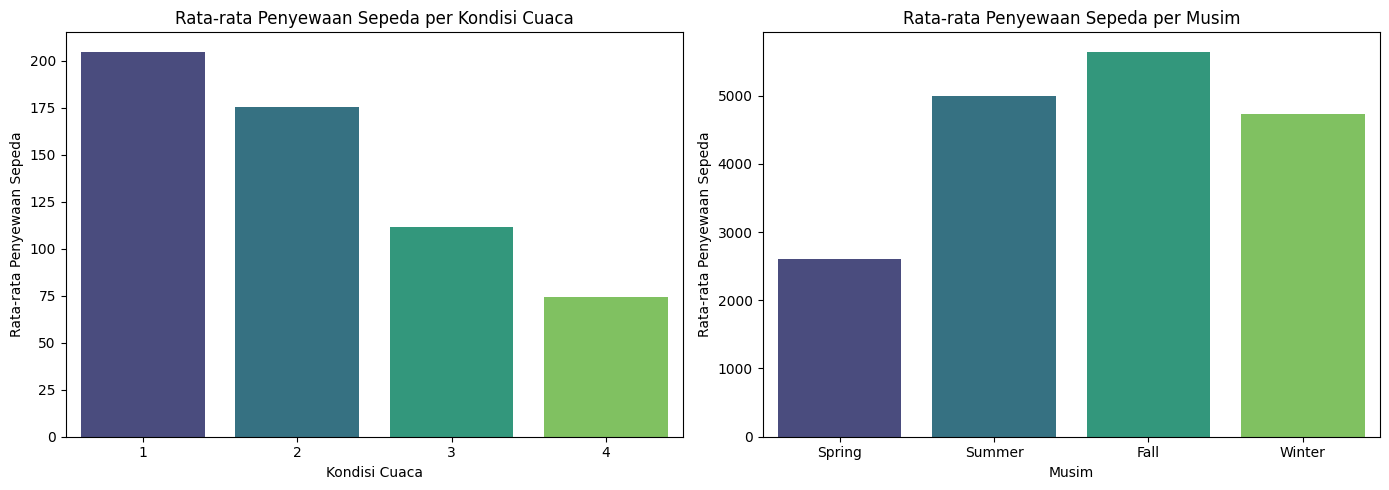

In [280]:
# rata-rata penyewaan per cuaca
weather_avg = hour_df.groupby("weathersit")["cnt"].mean().reset_index()

# rata-rata penyewaan per musim
season_avg = day_df.groupby("season")["cnt"].mean().reset_index()

season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
season_avg["season"] = season_avg["season"].map(season_labels)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Bar Chart untuk cuaca
sns.barplot(ax=axes[0], x="weathersit", y="cnt", data=weather_avg, palette="viridis")
axes[0].set_title("Rata-rata Penyewaan Sepeda per Kondisi Cuaca")
axes[0].set_xlabel("Kondisi Cuaca")
axes[0].set_ylabel("Rata-rata Penyewaan Sepeda")

# Bar Chart untuk musim
sns.barplot(ax=axes[1], x="season", y="cnt", data=season_avg, palette="viridis")
axes[1].set_title("Rata-rata Penyewaan Sepeda per Musim")
axes[1].set_xlabel("Musim")
axes[1].set_ylabel("Rata-rata Penyewaan Sepeda")

plt.tight_layout()

plt.show()

**Insight:**

- Catatan untuk label Barchart Rata-rata penyewaan Sepeda per Kondisi Cuaca:
  + 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
  + 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
  + 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan tersebar, HujanRingan + Awan tersebar
  + 4: Hujan Lebat + Es + Badai Petir + Kabut, Salju + Kabut


- Rata-rata jumlah penyewa sepeda terbanyak pada saat cuaca Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian, dan paling sedikit pada saat cuaca Hujan Lebat + Es + Badai Petir + Kabut, Salju + Kabut. Hal ini menunjukkan bahwa cuaca merupakan faktor penting dalam penggunaan sepeda, jika cuaca buruk pengguna lebih memilih menggunakan transportasi jenis lain

- Rata-rata jumlah penyewa sepeda terbanyak pada musim gugur  diikuti dengan musim panas dan musim dingin yang tidak jauh menurun. Pada urutan terakhir yaitu penyewa paling sedikit pada musim Spring(semi). Jumlah penyewaan sepeda pada musim semi dapat ditingkatkan untuk strastegi pemasaran misalnya dengan memberikan diskon musim semi.

### Pertanyaan 2 : Pada jam berapa dan hari apa jumlah penyewaan sepeda paling tinggi dan paling rendah?

<ipython-input-281-bc2ca4acb36a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x="weekday", y="cnt", data=weekday_avg, palette="magma")
<ipython-input-281-bc2ca4acb36a>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(weekday_avg["weekday"], rotation=45)


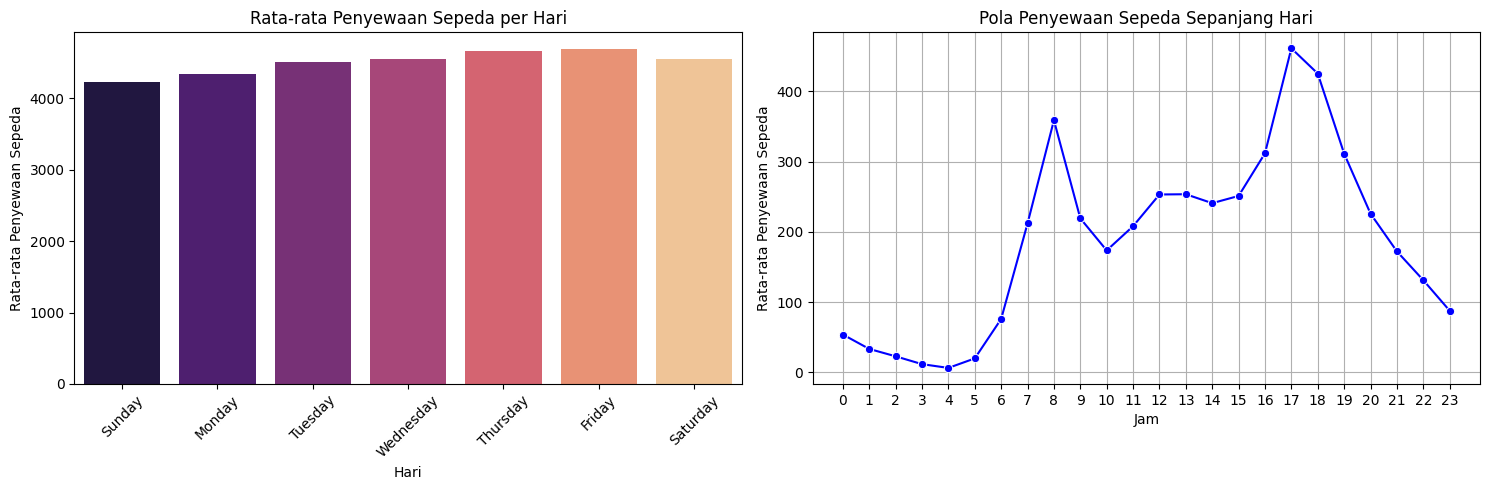

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns

# rata-rata penyewaan per hari
weekday_avg = day_df.groupby("weekday")["cnt"].mean().reset_index()
weekday_labels = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
                  4: "Thursday", 5: "Friday", 6: "Saturday"}
weekday_avg["weekday"] = weekday_avg["weekday"].map(weekday_labels)

# rata-rata penyewaan per jam
hourly_avg = hour_df.groupby("hr")["cnt"].mean().reset_index()

# figure dan dua subplot
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Grafik 1: Penyewaan sepeda per hari
sns.barplot(ax=axes[0], x="weekday", y="cnt", data=weekday_avg, palette="magma")
axes[0].set_title("Rata-rata Penyewaan Sepeda per Hari")
axes[0].set_xlabel("Hari")
axes[0].set_ylabel("Rata-rata Penyewaan Sepeda")
axes[0].set_xticklabels(weekday_avg["weekday"], rotation=45)

# Grafik 2: Penyewaan sepeda per jam
sns.lineplot(ax=axes[1], x="hr", y="cnt", data=hourly_avg, marker="o", color="b")
axes[1].set_title("Pola Penyewaan Sepeda Sepanjang Hari")
axes[1].set_xlabel("Jam")
axes[1].set_ylabel("Rata-rata Penyewaan Sepeda")
axes[1].set_xticks(range(0, 24))
axes[1].grid(True)

plt.tight_layout()
plt.show()


**Insight:**
- Pada Grafik Rata-rata penyewaan sepeda per hari menunjukkan rata-rata jumlah penyewaan sepeda tertinggi pada hari kerja yaitu hari kamis dan jumat. Sedangkan pada hari minggu menunjukkan angka paling sedikit.
- Pada grafik Pola Penyewaan Sepeda Sepanjang hari menunjukkan rata-rata  Penyewaan sepeda tertinggi pada jam 5-6 sore dan diikuti pada jam 8 pagi. Sedangkan peminjaman terendah pada saat malam dan subuh karena merupakan jam tidur.
- Sehingga dapat dikatakan penyewaan sepeda dengan jumlah terbanyak yaitu pada hari jumat dan pada jam 5-6 sore dan jam 8 pagi.

## Analisis Lanjutan dengan Teknik Clustering(Metode Manual Grouping)

Analisi lanjutan akan menjawab pertanyaan terakhir yaitu apa pengaruh parameter cuaca seperti suhu, kelembaban, dan kecepatan angin mempengaruhi jumlah penyewaan sepeda.
Langkah yang akan saya lakukan untuk menerapkan Analisis lanjutan dengan teknik clustering dan metode manual grouping adalah sebagai berikut:
1. Menentukan Kriteria Pengelompokan
  - temp: Dingin (< 0.3), Normal (0.3 - 0.6), Panas (> 0.6)
  - atemp: Sejuk (< 0.3), Hangat (0.3 - 0.6), Panas (> 0.6)
  - hum: Kering (< 0.4), Normal (0.4 - 0.7), Lembap (> 0.7)
  - windspeed: Lemah (< 0.2), Sedang (0.2 - 0.4), Kuat (> 0.4)

2. Mengelompokkan Data Berdasarkan Kriteria menggunakan pd.cut() untuk mengelompokkan nilai berdasarkan rentang yang sudah ditentukan.

3. Analisis Distribusi Data dalam Setiap Grup menggunakan value_counts() untuk melihat jumlah data dalam setiap kategori dan menggunakan visualisasi bar chart dan pie chart.

<ipython-input-282-0a8f64832584>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_group', y='cnt', data=temp_group, palette=colors, ax=axes[0, 0])
<ipython-input-282-0a8f64832584>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='atemp_group', y='cnt', data=atemp_group, palette=colors, ax=axes[0, 1])
<ipython-input-282-0a8f64832584>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hum_group', y='cnt', data=hum_group, palette=colors, ax=axes[1, 0])
<ipython-input-282-0a8f64832584>:71: FutureWarning: 

Passing `palette` without

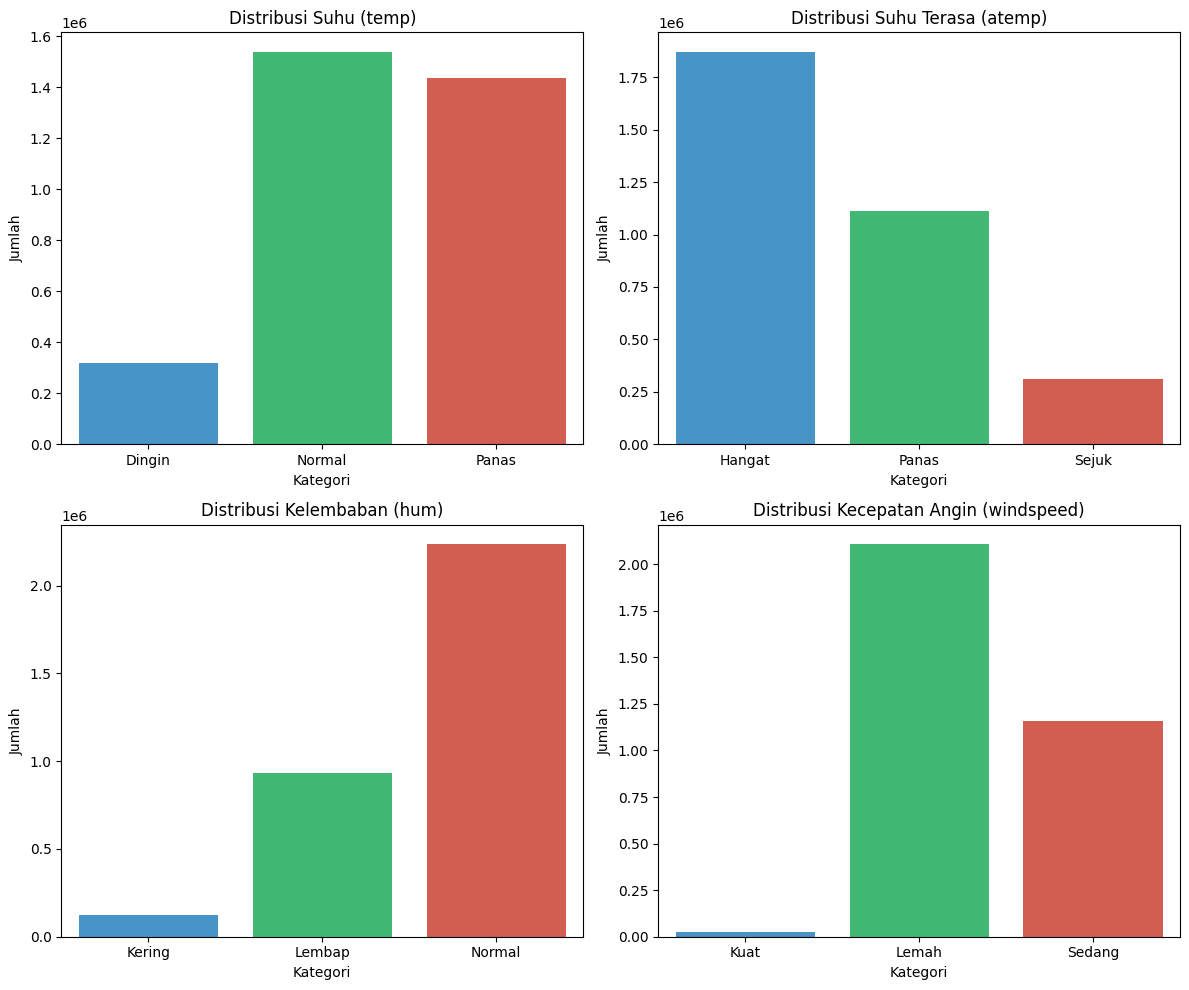

In [282]:
day_df_copy = day_df.copy()

# melakukan Manual Grouping
def categorize_temp(temp):
    if temp < 0.3:
        return 'Dingin'
    elif temp <= 0.6:
        return 'Normal'
    else:
        return 'Panas'

def categorize_atemp(atemp):
    if atemp < 0.3:
        return 'Sejuk'
    elif atemp <= 0.6:
        return 'Hangat'
    else:
        return 'Panas'

def categorize_hum(hum):
    if hum < 0.4:
        return 'Kering'
    elif hum <= 0.7:
        return 'Normal'
    else:
        return 'Lembap'

def categorize_windspeed(windspeed):
    if windspeed < 0.2:
        return 'Lemah'
    elif windspeed <= 0.4:
        return 'Sedang'
    else:
        return 'Kuat'

# kolom kategori
day_df_copy['temp_group'] = day_df_copy['temp'].apply(categorize_temp)
day_df_copy['atemp_group'] = day_df_copy['atemp'].apply(categorize_atemp)
day_df_copy['hum_group'] = day_df_copy['hum'].apply(categorize_hum)
day_df_copy['windspeed_group'] = day_df_copy['windspeed'].apply(categorize_windspeed)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Warna
colors = ['#3498db', '#2ecc71', '#e74c3c']

# temp
temp_group = day_df_copy.groupby('temp_group')['cnt'].sum().reset_index()
sns.barplot(x='temp_group', y='cnt', data=temp_group, palette=colors, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Suhu (temp)')
axes[0, 0].set_xlabel('Kategori')
axes[0, 0].set_ylabel('Jumlah')

# atemp
atemp_group = day_df_copy.groupby('atemp_group')['cnt'].sum().reset_index()
sns.barplot(x='atemp_group', y='cnt', data=atemp_group, palette=colors, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Suhu Terasa (atemp)')
axes[0, 1].set_xlabel('Kategori')
axes[0, 1].set_ylabel('Jumlah')

# hum
hum_group = day_df_copy.groupby('hum_group')['cnt'].sum().reset_index()
sns.barplot(x='hum_group', y='cnt', data=hum_group, palette=colors, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Kelembaban (hum)')
axes[1, 0].set_xlabel('Kategori')
axes[1, 0].set_ylabel('Jumlah')

# windspeed
windspeed_group = day_df_copy.groupby('windspeed_group')['cnt'].sum().reset_index()
sns.barplot(x='windspeed_group', y='cnt', data=windspeed_group, palette=colors, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Kecepatan Angin (windspeed)')
axes[1, 1].set_xlabel('Kategori')
axes[1, 1].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

**Insight:**
- Pada grafik Distribusi Suhu(temp):
 + Pada suhu "Normal" memiliki frekuensi penyewaan sepeda yang paling tinggi
 + Pada Suhu "Panas" juga cukup tinggi, tetapi lebih rendah dibandingkan suhu "Normal".
 + Suhu "Dingin" memiliki frekuensi penyewaan sepeda terendah

- Pada grafik Distribusi Suhu Terasa (atemp)
 + Pada suhu "Hangat" memiliki frekuensi penyewaan sepeda yang paling tinggi
 + Pada suhu "Panas" juga cukup tinggi, tetapi lebih rendah dibandingkan suhu "Hangat"
 + Pada suhu "Sejuk" memiliki frekuensi penyewaan sepeda terendah

- Pada grafik Distribusi Kelembaban (hum)
 + Pada kelembaban "Normal" memiliki jumlah penyewaan sepeda paling tinggi dibandingkan kategori lainnya
 + Pada kelembaban "Lembab" juga cukup sering terjadi, tetapi lebih rendah dibandingkan suhu "Normal"
 + Pada kelembaban "Kering" memiliki frekuensi penyewaan terendah

- Pada grafik Distribusi Kecepatan Angin(winspeed)
 + Pada kecepatan angin "Sedang" memiliki frekuensi tertinggi dibandingkan kategori lainnya
 + Pada kecepatan angin "Sedang" juga cukup sering terjadi, tetapi lebih rendah dibandingkan kecepatan angin "Sedang"
 + Pada kecepatan angin "Kuat" memiliki frekuensi penyewaan terendah

## Conclusion

- Conclution pertanyaan 1
  + Cuaca dan musim sangat mempengaruhi jumlah penyewaan sepeda. Jika ingin meningkatkan penyewaan pada musim dingin atau cuaca buruk, bisa dipertimbangkan strategi seperti promosi, penyediaan pakaian tahan hujan/dingin, atau jalur sepeda yang lebih aman di musim tertentu. Untuk bisnis penyewaan sepeda, hasil analisis data ini bisa digunakan untuk optimasi stok sepeda berdasarkan musim, misalnya lebih banyak unit tersedia di musim panas dan gugur.

- Conclution pertanyaan 2 :
  + Hari dengan penyewaan tertinggi memang terjadi pada hari kerja (Kamis & Jumat), dengan Jumat sebagai hari dengan penyewaan tertinggi. Hari kerja memiliki penyewaan tinggi karena banyak orang menggunakan sepeda sebagai alat transportasi ke kantor/sekolah.Hari dengan penyewaan terendah terjadi pada hari Minggu karena lebih sedikit orang yang beraktivitas rutin atau bepergian menggunakan sepeda.
  + Jam penyewaan tertinggi terjadi pada jam 5-6 sore (17:00-18:00) dan diikuti oleh jam 8 pagi (08:00). Puncak peminjaman pada pagi dan sore hari berkaitan dengan jam berangkat dan pulang kerja/sekolah.
  + Jam penyewaan terendah terjadi pada malam hingga subuh, karena merupakan waktu tidur.

- Conclution pertanyaan 3
  + Penyewaan sepeda cenderung lebih tinggi saat kondisi cuaca berada dalam tingkat kenyamanan optimal, yaitu suhu Normal atau suhu terasa Hangat, kelembaban Normal, dan kecepatan angin Sedang. Kondisi ekstrem seperti suhu terlalu dingin atau panas, kelembaban terlalu lembap atau kering, serta kecepatan angin terlalu kuat dapat mengurangi minat masyarakat untuk menyewa sepeda.
  + Hal ini menunjukkan bahwa faktor lingkungan berperan penting dalam perilaku penyewaan sepeda, dan pemilik layanan penyewaan bisa menggunakan informasi ini untuk strategi promosi atau penyediaan fasilitas yang lebih sesuai dengan kondisi cuaca.

In [286]:
day_df.to_csv("day_data.csv", index=False)

In [287]:
hour_df.to_csv("hour_data.csv", index=False)